                 Price    Return  logReturn  RiskFreeRate   Premium  \
Date                                                                  
1993/9/30    4007.8640 -0.007708  -0.007738        0.0295 -0.037208   
1993/10/29   4090.7704  0.020686   0.020475        0.0302 -0.009514   
1993/11/30   4051.7672 -0.009534  -0.009580        0.0310 -0.040534   
1993/12/31   4100.6577  0.012066   0.011994        0.0306 -0.018534   
1994/1/31    4240.0937  0.034003   0.033438        0.0298  0.004203   
...                ...       ...        ...           ...       ...   
2019/8/30   42503.1924 -0.015840  -0.015967        0.0195 -0.035340   
2019/9/30   43298.1954  0.018705   0.018532        0.0189 -0.000195   
2019/10/31  44235.9175  0.021657   0.021426        0.0165  0.005157   
2019/11/29  45841.6770  0.036300   0.035657        0.0154  0.020900   
2019/12/31  47221.9351  0.030109   0.029665        0.0154  0.014709   

            logRPremium  
Date                     
1993/9/30     -0.037238 

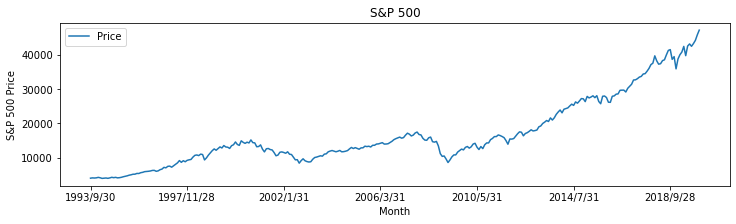

[112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
 172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
 230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
 237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
 203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
 284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306. 315. 301.
 356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318. 362. 348.
 363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396. 420. 472.
 548. 559. 463. 407. 362. 405. 417. 391. 419. 461. 472. 535. 622. 606.
 508. 461. 390. 432.]


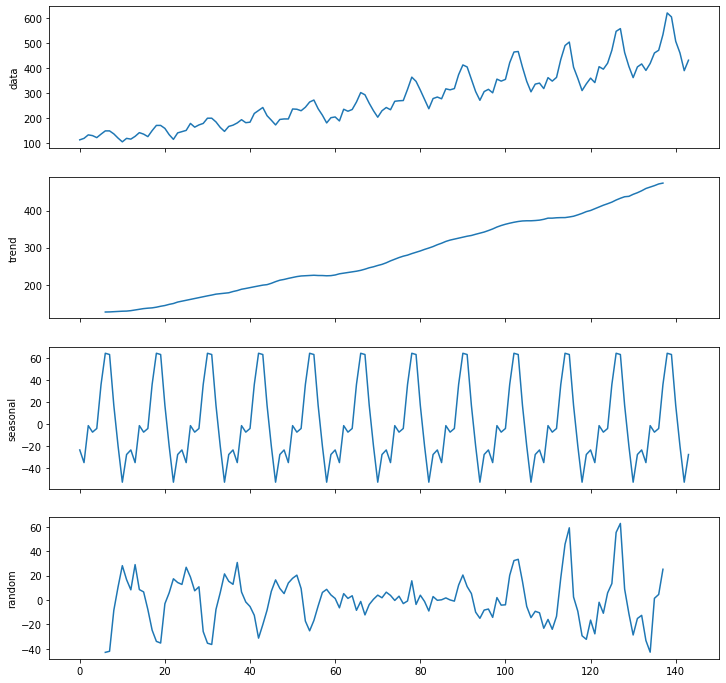

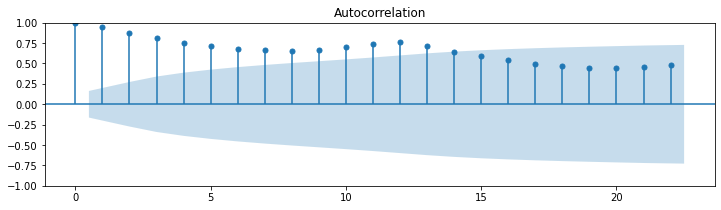

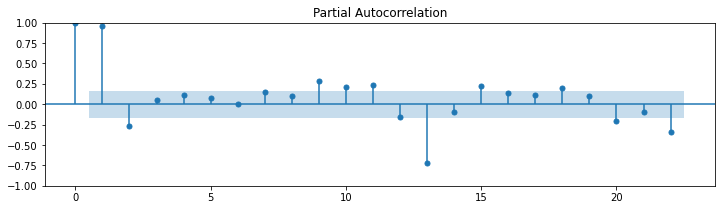

d = 1
D = 1


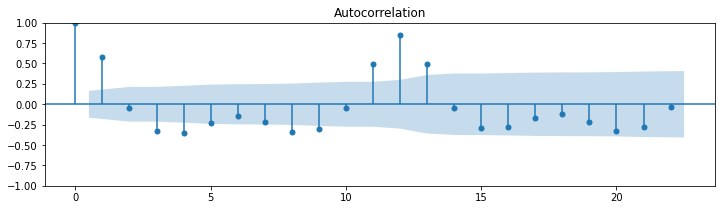

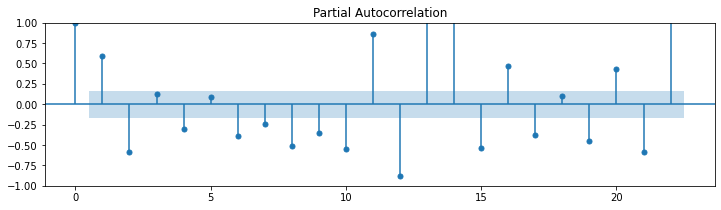

[112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
 172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
 230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
 237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
 203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
 284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306. 315. 301.
 356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318. 362. 348.
 363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396. 420. 472.
 548. 559. 463. 407.]
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=894.075, Time=1.19 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1000.326, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=890.024, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=944.601, Time=0.51 sec
 ARIMA(0,0,0)(0,1,0)[12]       

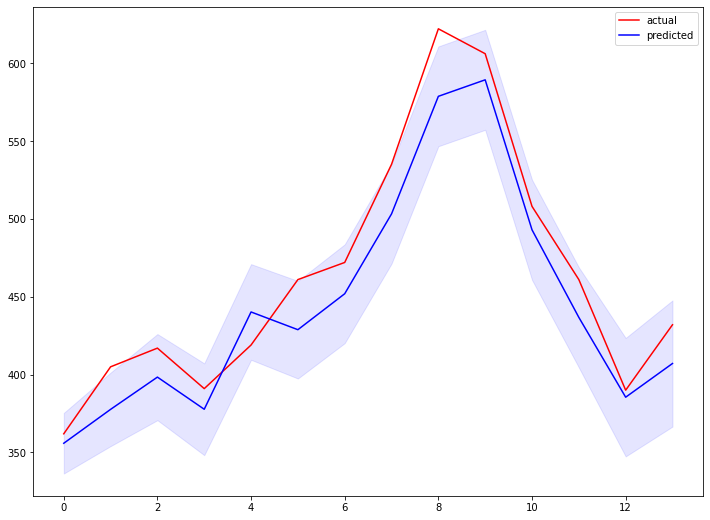

In [6]:
import os as os
import numpy as np
import scipy.stats as st
import cvxpy as cvx
import pandas as pd
import datetime
import warnings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pmdarima as pm
from pmdarima import datasets
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection
from sklearn.metrics import mean_absolute_error
from statistics import mean 


import math


warnings.filterwarnings('ignore')


#os.chdir('C:/directindex/ver1')
os.chdir('C:/Users/208017/Documents/riskreturn/baseline')

Benchmark=pd.read_csv('./data/'+'sp500Premium19930930_1.csv')
# Benchmark=pd.read_csv('./data/'+'sp500Premium.csv')



Benchmark = Benchmark.set_index('Date')  
                      
#月次リターンのためコピー
# Benchmark = Benchmark.pct_change()
# Benchmark = Benchmark.fillna(0)


print(Benchmark)


df = Benchmark



Benchmark.plot(y='Price')

plt.title('S&P 500')

plt.ylabel('S&P 500 Price')
plt.xlabel('Month')

plt.savefig("Price.png")
plt.show()


#data = Benchmark['Price'].values

data = datasets.load_airpassengers()

print(data)


# data = datasets.load_wineind()
# # グラフ（折れ線）
# plt.plot(data)


# # print(data)

utils.decomposed_plot(arima.decompose(data,'additive',m=12),
                      figure_kwargs = {'figsize': (12, 12)} )


# グラフのサイズ変更
plt.rcParams['figure.figsize'] = [12, 3]
# 自己相関と偏自己相関
utils.plot_acf(data, alpha=.05)
utils.plot_pacf(data, alpha=.05)



# print(np.diff(math.log(data)))

# 階差の次数の検討
print('d =', arima.ndiffs(data)) #d（階差）
print('D =', arima.nsdiffs(data,m=12)) #D（季節階差）


# 通常の階差処理を1回しさらに季節階差処理を1回
data_d1_d12 = pd.DataFrame(data).diff(2).dropna()


# グラフのサイズ変更
plt.rcParams['figure.figsize'] = [12, 3]
# 自己相関と偏自己相関
utils.plot_acf(data_d1_d12, alpha=.05)
utils.plot_pacf(data_d1_d12, alpha=.05)



train, test = model_selection.train_test_split(data, train_size=130)


print(train)

arima_model = pm.auto_arima(train, 
                            seasonal=True,
                            m=12,
                            trace=True,
                            n_jobs=-1,
                            maxiter=10)

# グラフのサイズ変更
plt.rcParams['figure.figsize'] = [12, 9]
# 予測
preds, conf_int = arima_model.predict(n_periods=test.shape[0], 
                                      return_conf_int=True)
# 予測精度
print('MAE:')
print(mean_absolute_error(test, preds)) 
print('MAPE(%):')
print(mean(abs(test - preds)/test) *100)
# 予測と実測の比較（グラフ）
x_axis = np.arange(preds.shape[0])
plt.plot(x_axis,test,label="actual",color='r') 
plt.plot(x_axis,preds,label="predicted",color='b')
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.legend()
plt.show()


